In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("./project_data.csv")

In [3]:
profile = ProfileReport(df, title="Pandas Profiling Report",
                        vars=dict(cat=dict(characters=False)),
                       )

In [4]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [36]:
profile.to_notebook_iframe()

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
for c in ["c10", "c8"]:
    display(pd.crosstab(df[c], df.successful_sell))

successful_sell     no   yes
c10                         
no               36548     0
yes                  0  4640

successful_sell    no  yes
c8                        
no               3647  605
yes               479  894

In [13]:
df['y'] = (df.successful_sell == 'yes').astype(int)

In [14]:
import seaborn

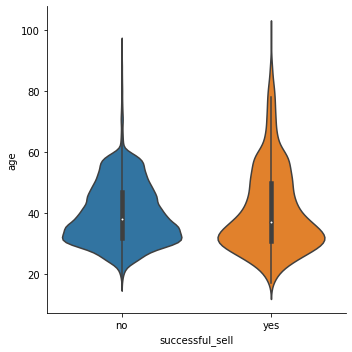

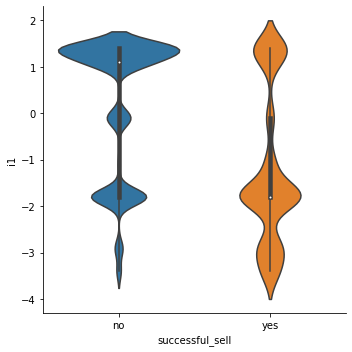

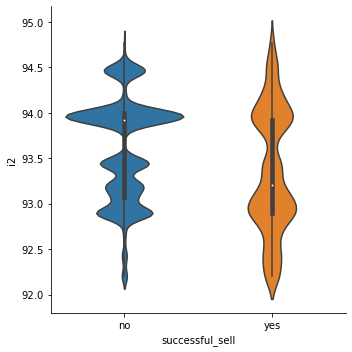

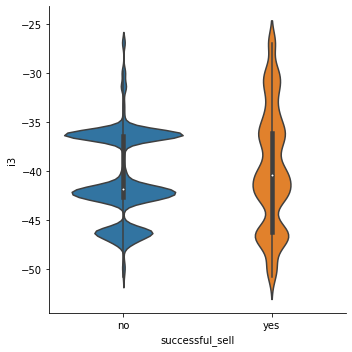

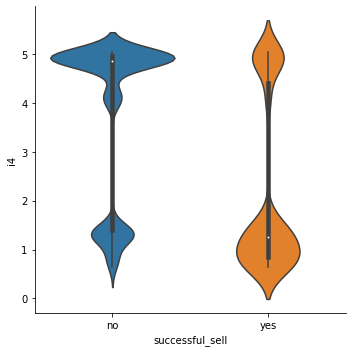

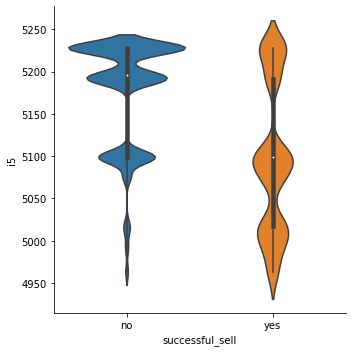

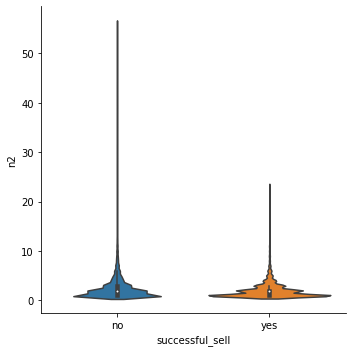

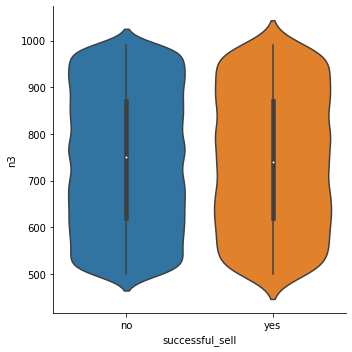

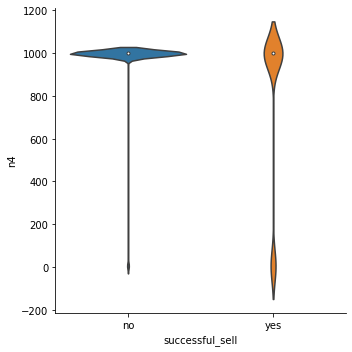

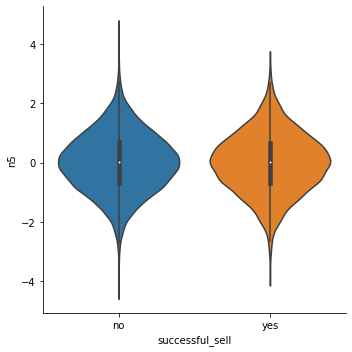

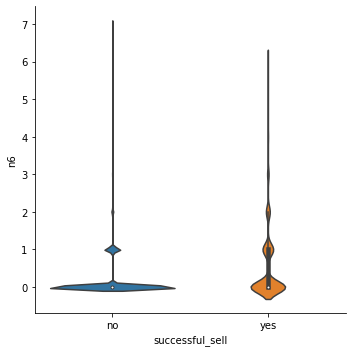

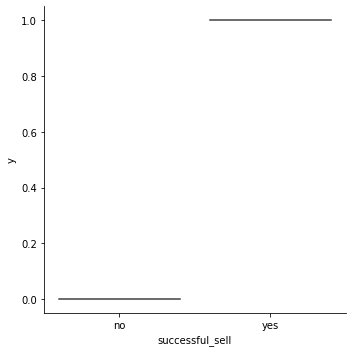

In [15]:
for c in df.select_dtypes(include = [np.number]):
    seaborn.catplot(data = df, x = 'successful_sell', y=c, kind='violin')
    plt.show()

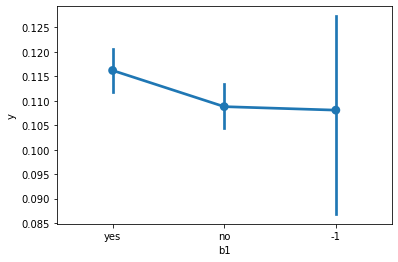

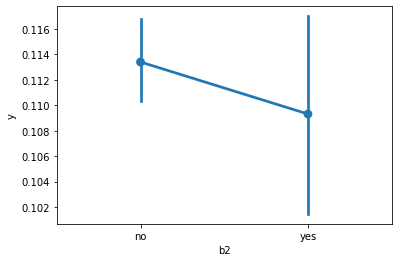

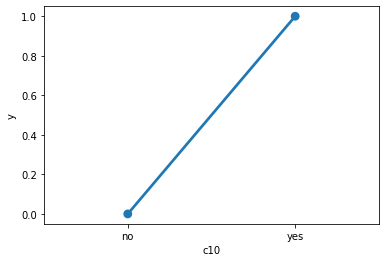

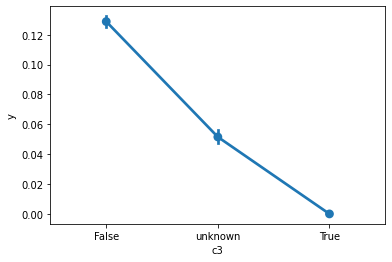

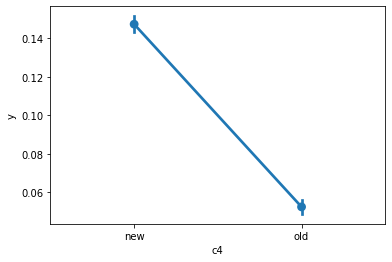

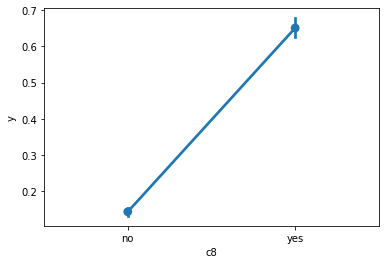

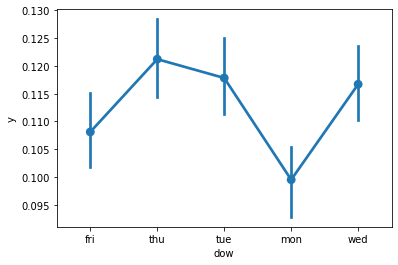

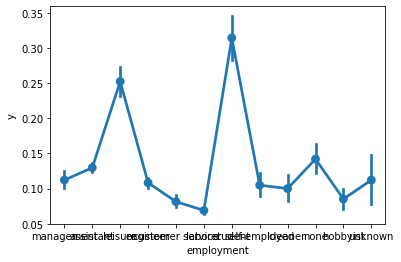

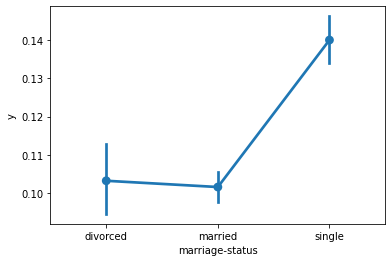

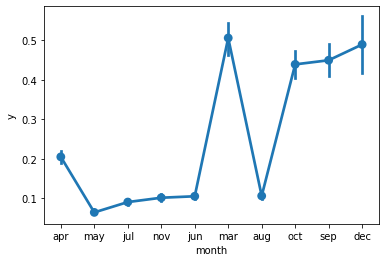

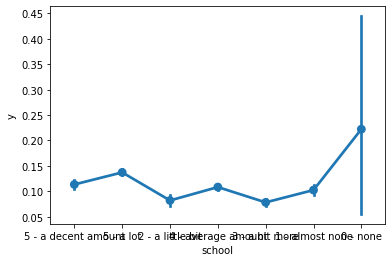

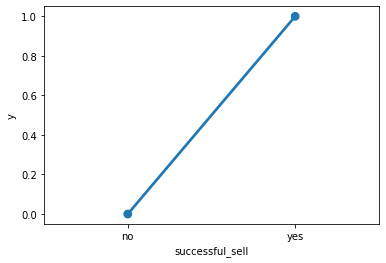

In [16]:
for c in df.select_dtypes(exclude = [np.number]):
    seaborn.pointplot(data = df, x = c, y='y', )
    plt.show()

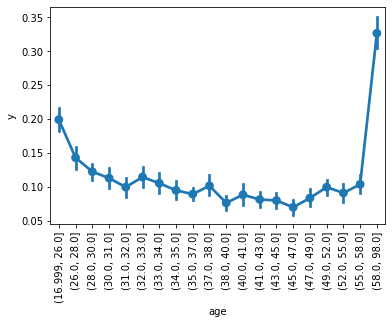

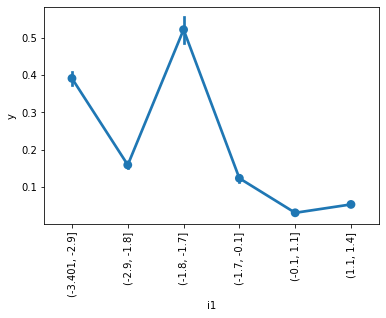

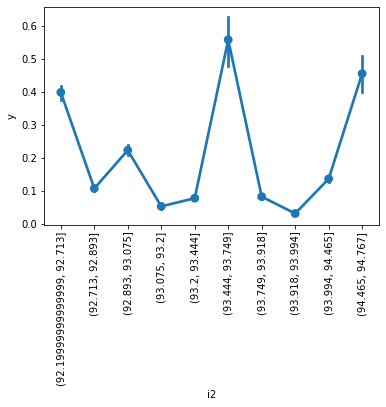

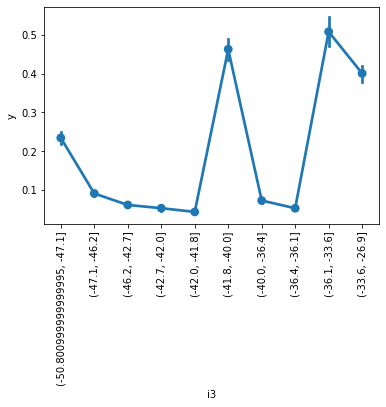

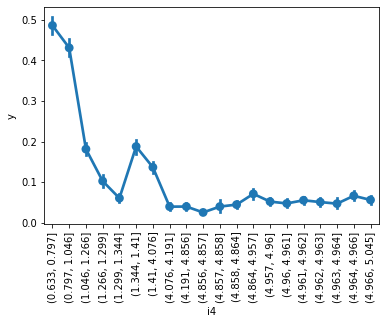

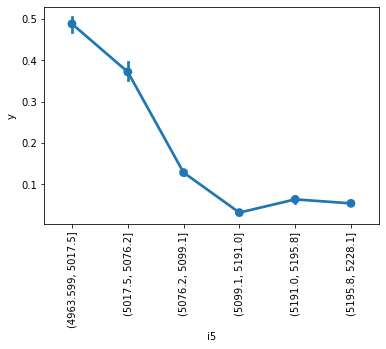

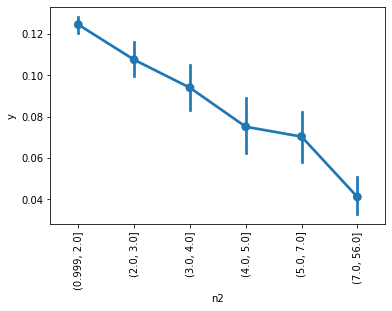

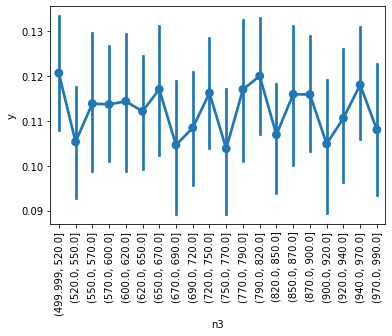

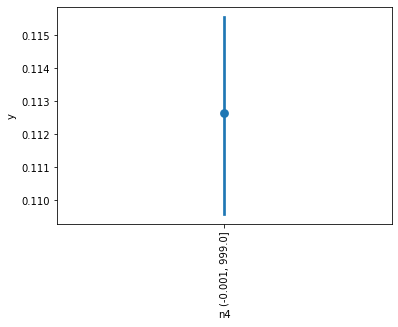

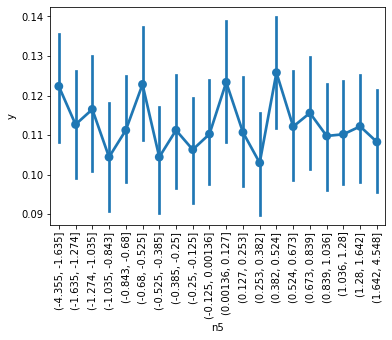

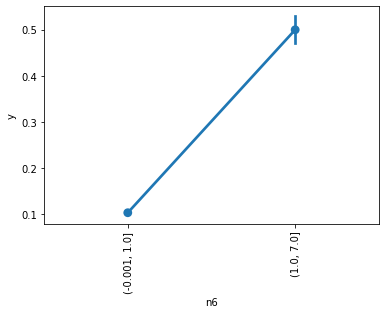

In [20]:
for c in df.select_dtypes(include = [np.number]):
    if c == 'y': continue
    g = pd.qcut(df[c], q=20, duplicates='drop')
    
    seaborn.pointplot(data = pd.concat([g,df.y], axis=1), x = c, y='y', )
    #plt.scatter(
    #    df[c].groupby(g).mean(),
    #    (df['successful_sell'] == 'yes').groupby(g).mean(),
    #)
    plt.xticks(rotation=90)
    plt.show()

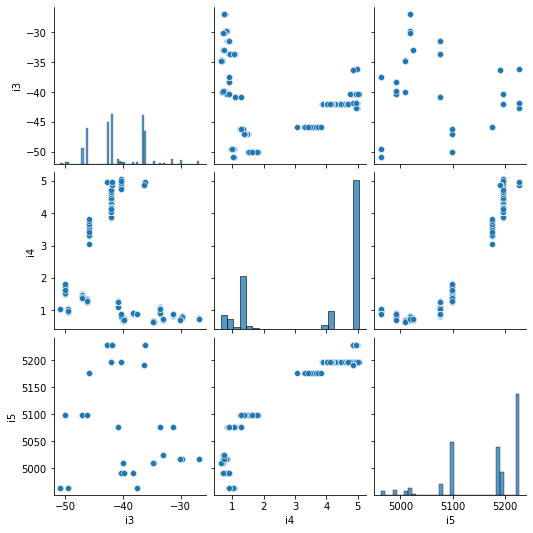

In [22]:
seaborn.pairplot(data=df, vars=['i3','i4', 'i5', ])

In [26]:
df.y.groupby(df.employment).mean().sort_values()

employment
laborer             0.068943
customer service    0.081381
hobbyist            0.085165
cleaner             0.100000
self-employed       0.104856
engineer            0.108260
unknown             0.112121
management          0.112175
assistant           0.129726
none                0.142012
leisure             0.252326
student             0.314286
Name: y, dtype: float64

In [15]:
df.groupby('school').y.mean()

school
0 - none               0.222222
1 - almost none        0.102490
2 - a little bit       0.082024
3 - a bit more         0.078246
4 - average amount     0.108355
5 - a decent amount    0.113485
5 - a lot              0.137245
Name: y, dtype: float64

<AxesSubplot:ylabel='month'>

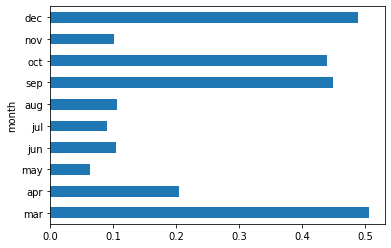

In [33]:
df.groupby('month').y.mean().loc[[ 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']].plot.barh()

<AxesSubplot:ylabel='month'>

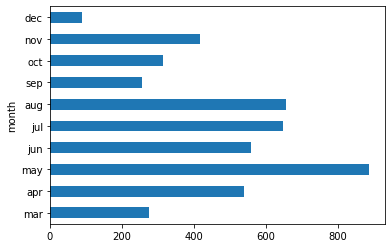

In [39]:
df.groupby('month').y.sum().loc[[ 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']].plot.barh()

<AxesSubplot:ylabel='month'>

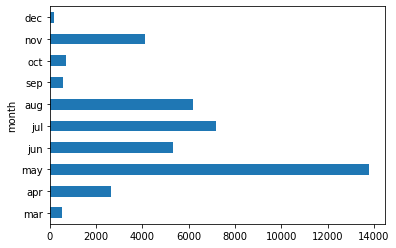

In [37]:
df.groupby('month').size().loc[[ 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']].plot.barh()

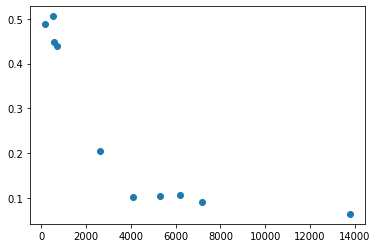

In [42]:
plt.scatter(
    df.groupby('month').y.size(),
    df.groupby('month').y.mean(),
)

In [35]:
 df.y.groupby(df.month.isin(['mar', 'sep', 'oct', 'dec'])).mean()

month
False    0.094557
True     0.464286
Name: y, dtype: float64

In [16]:

pd.crosstab(df.school[df.y == 1], df.employment[df.y == 1]) /  pd.crosstab(df.school, df.employment)

employment           assistant   cleaner  customer service  engineer  \
school                                                                 
0 - none              0.000000  0.000000               NaN       NaN   
1 - almost none       0.129870  0.107595          0.053030  0.155172   
2 - a little bit      0.052980  0.064935          0.088496  0.068966   
3 - a bit more        0.084168  0.031915          0.074742  0.096354   
4 - average amount    0.114749  0.080460          0.075690  0.097365   
5 - a decent amount   0.134986  0.186441          0.087156  0.103313   
5 - a lot             0.143056  0.122302          0.150289  0.124378   

employment           hobbyist   laborer   leisure  management      none  \
school                                                                    
0 - none             0.500000  0.000000  0.666667         NaN       NaN   
1 - almost none      0.051095  0.053063  0.309883    0.050000  0.142857   
2 - a little bit     0.126761  0.075035  0.133333    0.117647  0.117647   
3 - a bit more       0.057143  0.066243  0.131034    0.066265  0.139785   
4 - average amount   0.068376  0.107062  0.224638    0.057047  0.131274   
5 - a decent amount  0.066667  0.090508  0.236515    0.089888  0.140845   
5 - a lot            0.108197  0.095745  0.231579    0.124576  0.148855   

employment           self-employed   student   unknown  
school                                                  
0 - none                  0.333333       NaN       NaN  
1 - almost none           0.032258  0.307692  0.076923  
2 - a little bit          0.040000  0.538462  0.045455  
3 - a bit more            0.081818  0.353535  0.032258  
4 - average amount        0.067797  0.319328  0.054054  
5 - a decent amount       0.119048  0.395349  0.083333  
5 - a lot                 0.125490  0.205882  0.244444

<AxesSubplot:xlabel='n4'>

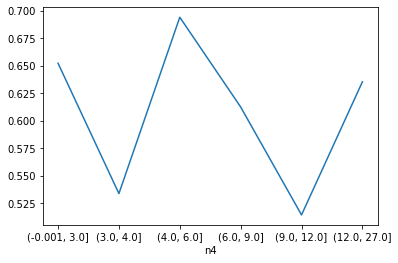

In [28]:
mask = df.n4 != 999
df[mask].groupby(pd.qcut(df.n4[mask], 10, duplicates='drop')).y.mean().plot()

In [31]:
df.y.groupby(mask).mean()

n4
False    0.092582
True     0.638284
Name: y, dtype: float64

In [30]:
pd.qcut(df.n4[mask], 10, duplicates='drop').value_counts()

(-0.001, 3.0]    541
(4.0, 6.0]       458
(6.0, 9.0]       142
(9.0, 12.0]      138
(3.0, 4.0]       118
(12.0, 27.0]     118
Name: n4, dtype: int64

In [ ]:
'n5', 'n3'